
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [ ]:
# Set your student number and name
student_number = '401106096'
Name = 'Radin'
Last_Name = 'Shahdaei'

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

## imports

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off');
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [ ]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



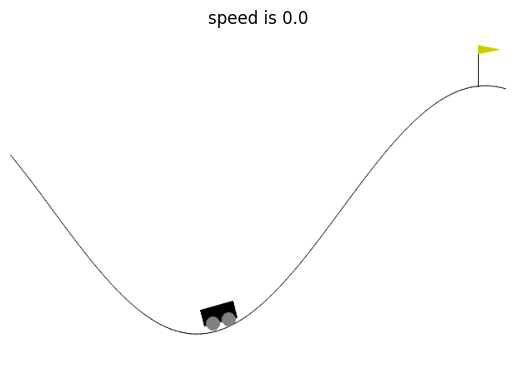

In [ ]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


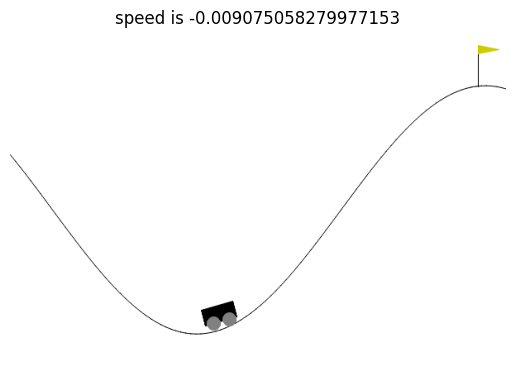

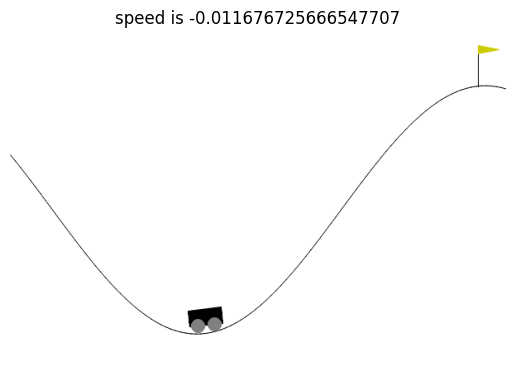

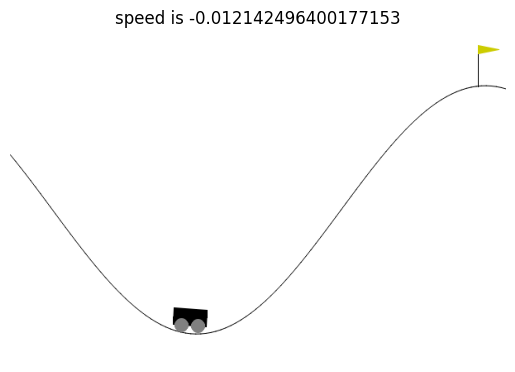

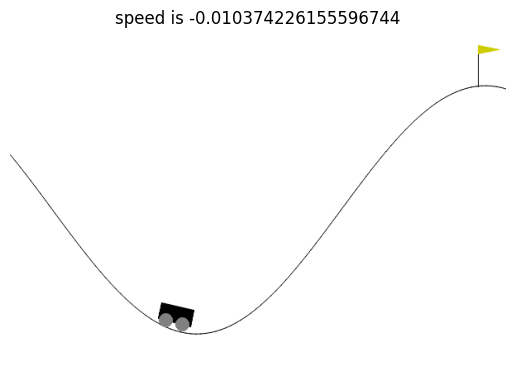

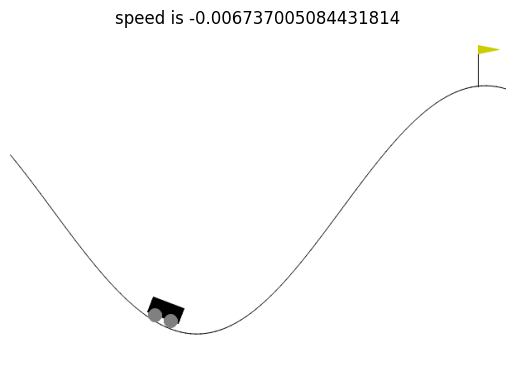

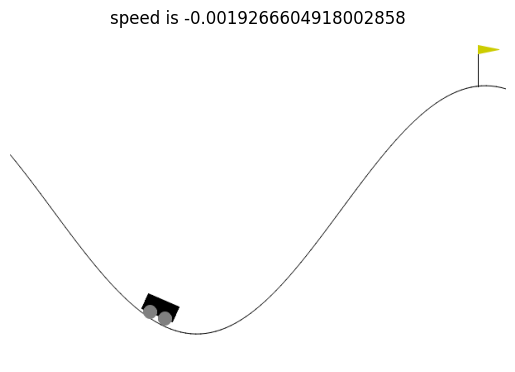

(array([-0.5581288,  0.       ], dtype=float32), {})

In [ ]:
env.reset() # You can use this function to reset your environment.
######################## YOUR CODE HERE ########################

env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
visualize(env)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
visualize(env)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
visualize(env)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
visualize(env)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
visualize(env)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
visualize(env)

######################## END YOUR CODE #########################
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [62]:
import numpy as np
import random

class MountainCarQL:
    def __init__(self, env, discrete_size=20):
        self.env = env
        self.discrete_size = discrete_size
        self.q_table = self.initialize_q_table()
        self.policy = {}
        self.total_score = 0
        self.is_terminal_state = False

    def initialize_q_table(self):
        discrete_state_size = [self.discrete_size] * len(self.env.observation_space.high)
        return np.zeros(discrete_state_size + [self.env.action_space.n])

    def discretize_state(self, state):
        discrete_state_size = [self.discrete_size] * len(self.env.observation_space.high)
        state_interval = self.env.observation_space.high - self.env.observation_space.low
        discrete_window_size = state_interval / discrete_state_size
        discrete_state = (state - self.env.observation_space.low) / discrete_window_size
        return tuple(discrete_state.astype(np.int32))

    def choose_action(self, discrete_state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, self.env.action_space.n - 1)
        else:
            return np.argmax(self.q_table[discrete_state])

    def update_q_value(self, current_state, action, reward, new_discrete_state, alpha, gamma):
        max_future_q = np.max(self.q_table[new_discrete_state])
        current_q = self.q_table[current_state + (action,)]
        new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
        self.q_table[current_state + (action,)] = new_q

    def reset_episode(self):
        self.total_score = 0
        self.is_terminal_state = False
        return self.discretize_state(self.env.reset()[0])

    def step_environment(self, action):
        new_state, reward, terminated, truncated, _ = self.env.step(action)
        done = terminated or truncated
        new_discrete_state = self.discretize_state(new_state)
        return new_state, reward, done, new_discrete_state

    def handle_episode(self, alpha, gamma, epsilon):
        current_state = self.reset_episode()
        while not self.is_terminal_state:
            action = self.choose_action(current_state, epsilon)
            new_state, reward, done, new_discrete_state = self.step_environment(action)
            self.update_q_value(current_state, action, reward, new_discrete_state, alpha, gamma)
            current_state = new_discrete_state
            self.check_terminal_state(new_state, action)

    def check_terminal_state(self, new_state, action):
        if new_state[0] >= self.env.unwrapped.goal_position:
            self.q_table[self.discretize_state(new_state) + (action,)] = 0
            self.is_terminal_state = True

    def learn(self, num_episodes, alpha, gamma, epsilon):
        for episode in range(num_episodes):
            self.handle_episode(alpha, gamma, epsilon)

    def create_policy(self):
        state_indices = np.indices(self.q_table.shape[:-1]).reshape(len(self.q_table.shape)-1, -1).T
        for state in state_indices:
            best_action = np.argmax(self.q_table[tuple(state)])
            self.policy[tuple(state)] = best_action

    def act(self):
        current_discrete_state = self.discretize_state(self.env.unwrapped.state)
        action = self.policy[current_discrete_state]
        next_state, reward, terminated, truncated, _ = self.env.step(action)
        self.is_terminal_state = terminated or truncated
        self.total_score += reward

    def run_episode(self):
        self.env.reset()
        self.total_score = 0
        self.is_terminal_state = False

        while not self.is_terminal_state:
            self.act()

        return self.total_score

    def evaluate(self, num_episodes):
        total_reward = 0
        success_count = 0
        for _ in range(num_episodes):
            episode_reward = self.run_episode()
            if episode_reward != -200:
                success_count += 1
            total_reward += episode_reward

        average_reward = total_reward / num_episodes
        success_rate = 100 * success_count / num_episodes
        return average_reward, success_rate

train your agent with good parameters

In [63]:
EPISODES = 15000
LEARNING_RATE = 0.15
DISCOUNT = 0.95
EPSILON = 0.1
DISCRETE_SIZE = 30


mountain_car_ql = MountainCarQL(env,discrete_size=DISCRETE_SIZE)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [64]:
mountain_car_ql.create_policy()
print(mountain_car_ql.evaluate(200))


(-153.515, 100.0)


show the path your car took for only one episode. Use visualize function every 10 frame.

Step: 0


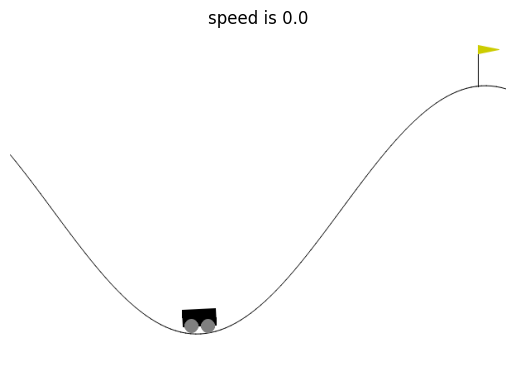

Step: 10


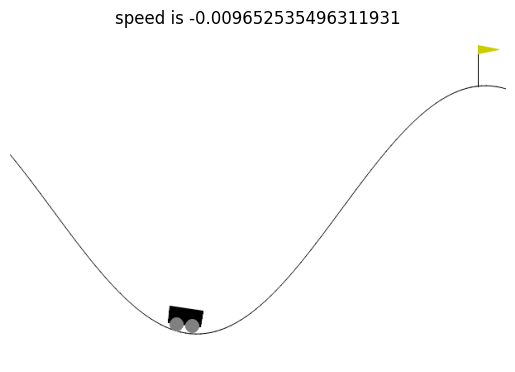

Step: 20


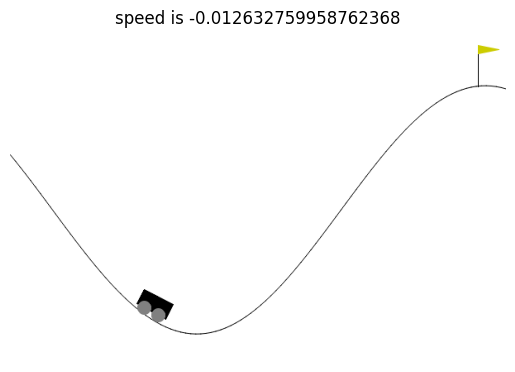

Step: 30


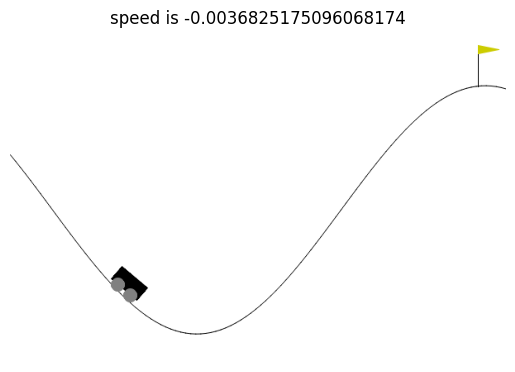

Step: 40


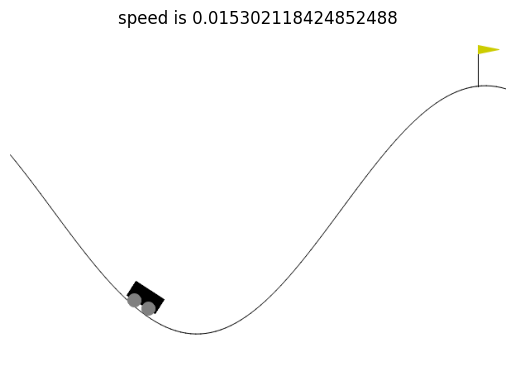

Step: 50


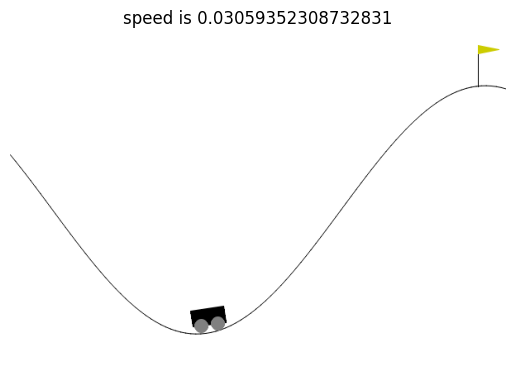

Step: 60


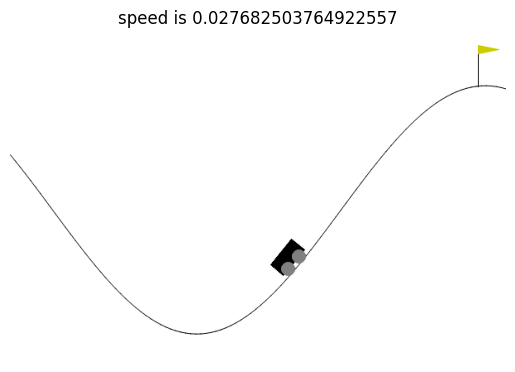

Step: 70


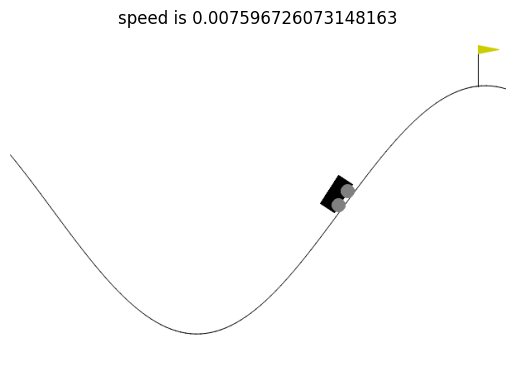

Step: 80


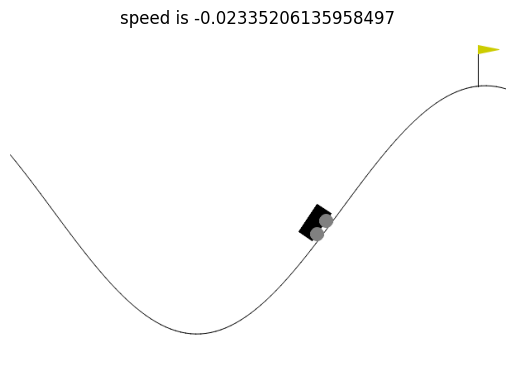

Step: 90


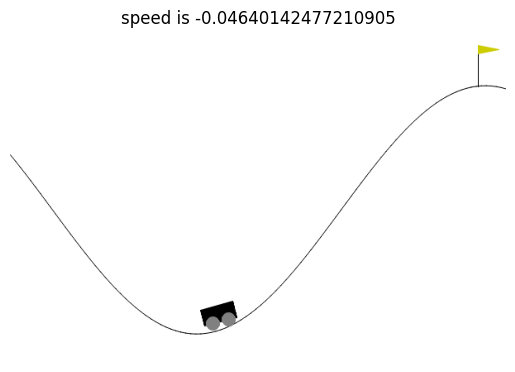

Step: 100


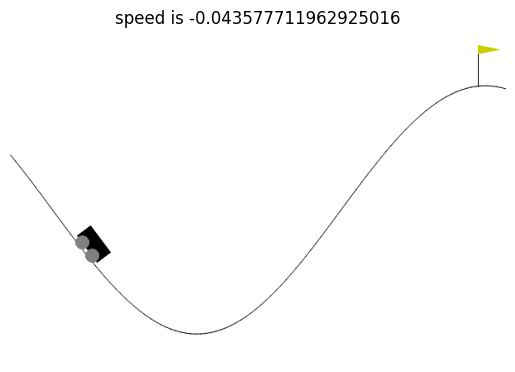

Step: 110


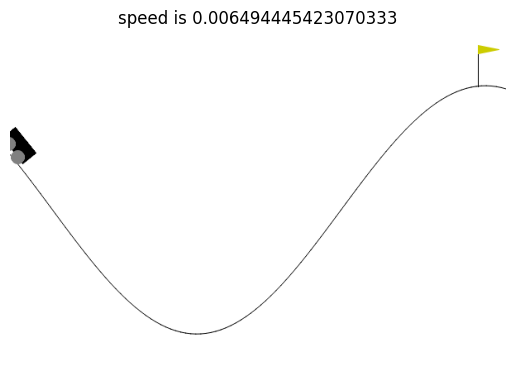

Step: 120


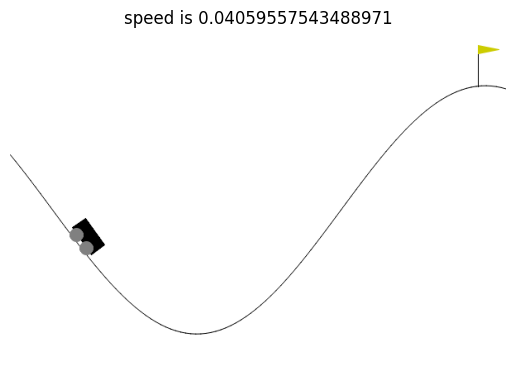

Step: 130


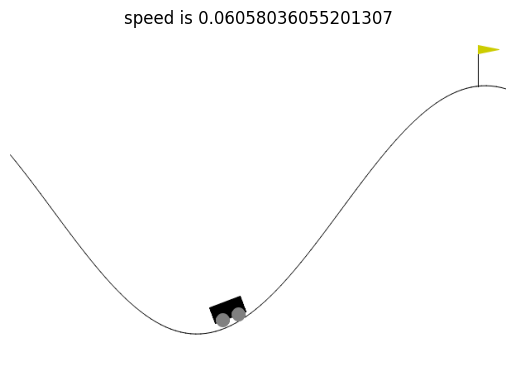

Step: 140


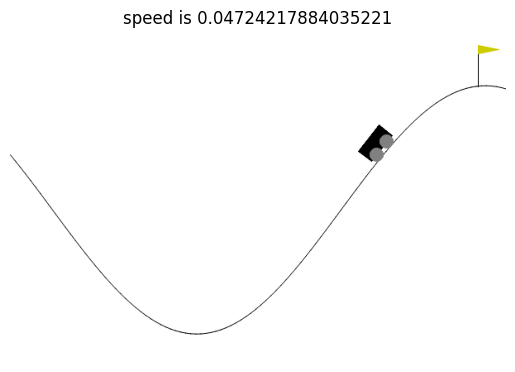

Total Score: -149.0


In [65]:
def run_episode_with_visualization(agent, env, visualize_every=10):

    def reset_agent_and_env(agent, env):
        env.reset()
        agent.total_score = 0
        agent.is_terminal_state = False

    def should_visualize(step, interval):
        return step % interval == 0

    reset_agent_and_env(agent, env)

    step = 0
    while not agent.is_terminal_state:
        if should_visualize(step, visualize_every):
            print(f"Step: {step}")
            visualize(env)

        agent.act()
        step += 1

    print(f"Total Score: {agent.total_score}")

run_episode_with_visualization(mountain_car_ql, env, visualize_every=10)



## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [70]:
import numpy as np
import random
import math

class MountainCarSarsa:

    def __init__(self, env, discrete_size=20):
        self.env = env
        self.discrete_size = discrete_size
        self.q_table = self.initialize_q_table()
        self.policy = {}
        self.total_score = 0
        self.is_terminal_state = False

    def initialize_q_table(self):
        # Initialize the Q-table with zeros based on the discrete state size and number of actions
        discrete_state_size = [self.discrete_size] * len(self.env.observation_space.high)
        return np.zeros(discrete_state_size + [self.env.action_space.n])

    def discretize_state(self, state):
        # Convert continuous state to a discrete state by finding the appropriate bucket for each dimension
        discrete_state_size = [self.discrete_size] * len(self.env.observation_space.high)
        state_interval = self.env.observation_space.high - self.env.observation_space.low
        discrete_window_size = state_interval / discrete_state_size
        discrete_state = (state - self.env.observation_space.low) / discrete_window_size
        return tuple(discrete_state.astype(np.int32))

    def choose_action(self, discrete_state, epsilon):
        # Choose an action based on epsilon-greedy policy:
        # With probability epsilon, choose a random action, otherwise choose the best known action
        if random.random() < epsilon:
            return random.randint(0, self.env.action_space.n - 1)
        else:
            return np.argmax(self.q_table[discrete_state])

    def update_q_value(self, current_state, action, reward, next_state, next_action, alpha, gamma):
        # Update Q-value using the SARSA formula
        current_q = self.q_table[current_state + (action,)]      # Current Q-value for the chosen action
        next_q = self.q_table[next_state + (next_action,)]       # Q-value for the next state-action pair
        # Calculate the new Q-value
        new_q = (1 - alpha) * current_q + alpha * (reward + gamma * next_q)
        self.q_table[current_state + (action,)] = new_q

    def run_single_step(self, current_state, current_action, alpha, gamma, epsilon):
        # Perform a single step in the environment and update Q-values
        next_state, reward, terminated, truncated, _ = self.env.step(current_action)
        done = terminated or truncated
        next_discrete_state = self.discretize_state(next_state)
        next_action = self.choose_action(next_discrete_state, epsilon)

        if not done:
            self.update_q_value(current_state, current_action, reward, next_discrete_state, next_action, alpha, gamma)
        elif next_state[0] >= self.env.unwrapped.goal_position:  # Check if goal is reached
            self.q_table[current_state + (current_action,)] = 0  # Set Q-value to 0 if goal is reached

        return next_discrete_state, next_action, done

    def handle_episode(self, alpha, gamma, epsilon):
        # Run a single episode of the SARSA algorithm
        current_state = self.discretize_state(self.env.reset()[0])
        current_action = self.choose_action(current_state, epsilon)
        done = False

        while not done:
            current_state, current_action, done = self.run_single_step(current_state, current_action, alpha, gamma, epsilon)

    def learn(self, num_episodes, alpha, gamma, epsilon):
        # Train the agent over multiple episodes using SARSA
        for episode in range(num_episodes):
            self.handle_episode(alpha, gamma, epsilon)  # Handle a single episode

    def create_policy(self):
        # Create a policy from the learned Q-values
        state_indices = np.indices(self.q_table.shape[:-1]).reshape(len(self.q_table.shape)-1, -1).T
        for state in state_indices:
            best_action = np.argmax(self.q_table[tuple(state)])  # Choose the best action for each state
            self.policy[tuple(state)] = best_action

    def act(self):
        # Take an action based on the current policy
        current_discrete_state = self.discretize_state(self.env.unwrapped.state)
        action = self.policy[current_discrete_state]  # Get the action from the policy
        next_state, reward, terminated, truncated, _ = self.env.step(action)
        self.is_terminal_state = terminated or truncated  # Check if the state is terminal
        self.total_score += reward  # Update the total score

    def run_episode(self):
        # Run a single evaluation episode
        self.env.reset()
        self.total_score = 0
        self.is_terminal_state = False

        while not self.is_terminal_state:
            self.act()  # Take action according to the policy

        return self.total_score

    def evaluate(self, num_episodes):
        # Evaluate the agent's performance over a number of episodes
        total_reward = 0
        success_count = 0
        for _ in range(num_episodes):
            episode_reward = self.run_episode()  # Run a single evaluation episode
            if episode_reward != -200:
                success_count += 1  # Count as success if not reaching maximum negative reward
            total_reward += episode_reward  # Sum the total rewards

        average_reward = total_reward / num_episodes  # Calculate the average reward
        success_rate = 100 * success_count / num_episodes  # Calculate the success rate
        return average_reward, success_rate


train your agent with good parameters

In [77]:
EPISODES = 15000
LEARNING_RATE = 0.3
DISCOUNT = 0.98
EPSILON = 0.25
DISCRETE_SIZE = 30

mountain_car_sarsa = MountainCarSarsa(env,discrete_size=DISCRETE_SIZE)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)


evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [78]:
mountain_car_sarsa.create_policy()
print(mountain_car_sarsa.evaluate(200))

(-155.915, 88.0)


show the path your car took for only one episode. Use visualize function every 10 frame.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step: 0


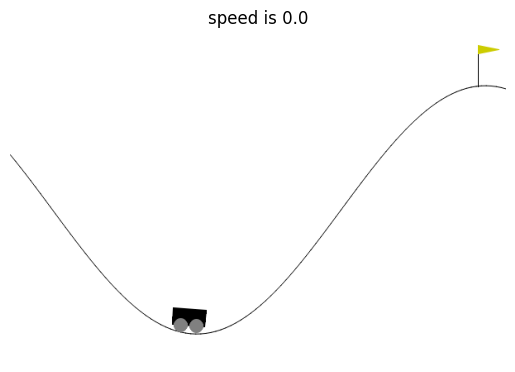

Step: 10


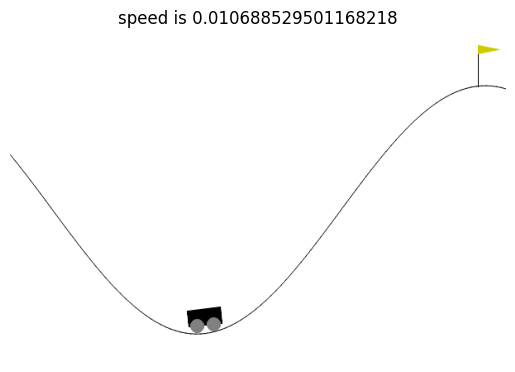

Step: 20


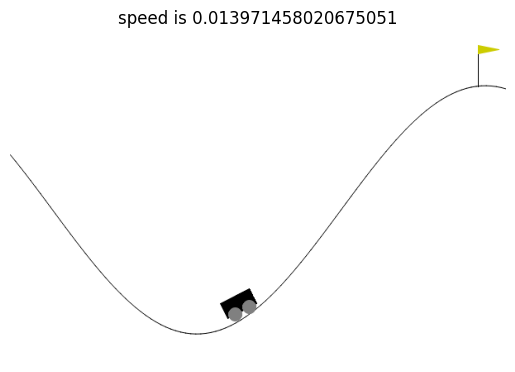

Step: 30


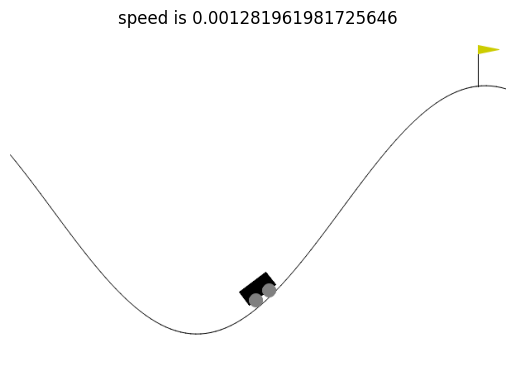

Step: 40


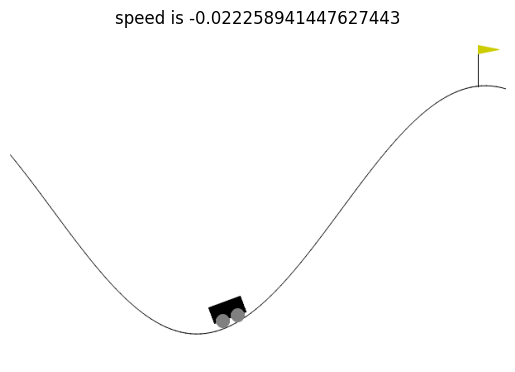

Step: 50


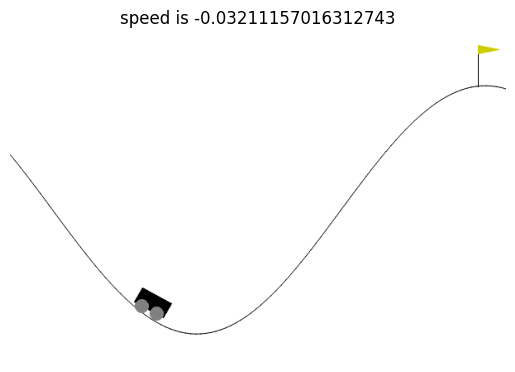

Step: 60


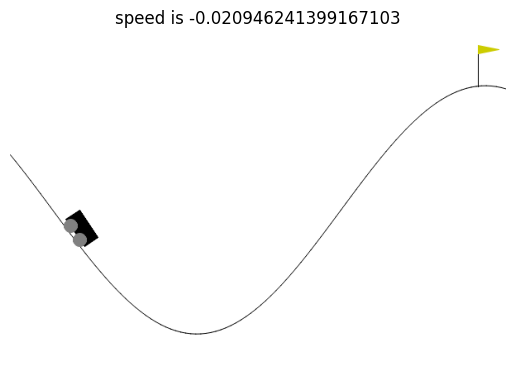

Step: 70


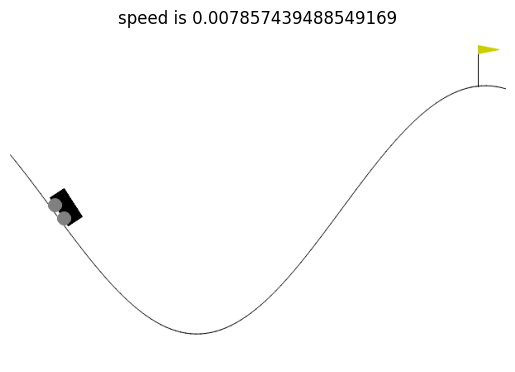

Step: 80


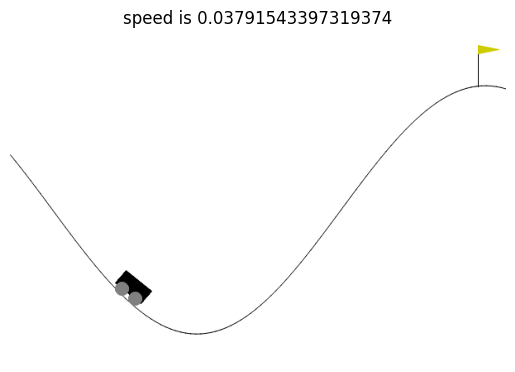

Step: 90


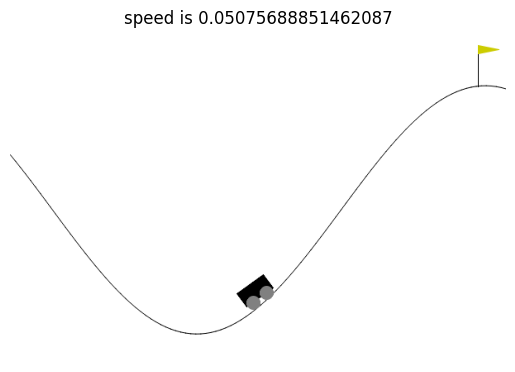

Step: 100


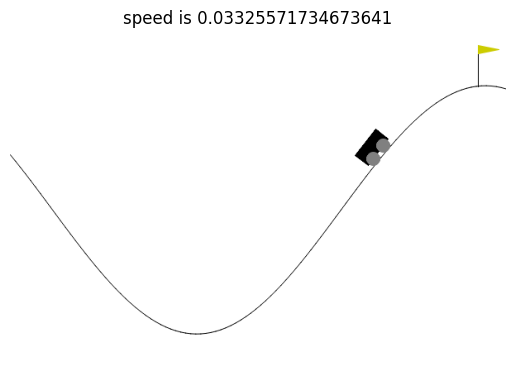

Step: 110


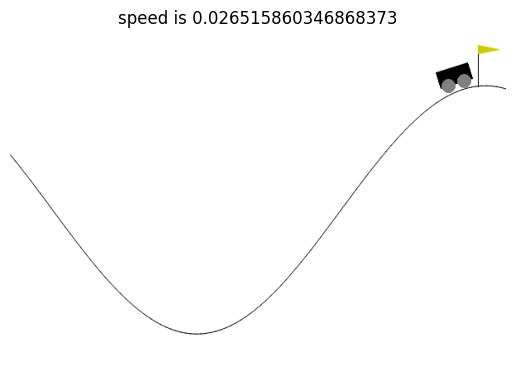

Total Score: -113.0


In [79]:
run_episode_with_visualization(mountain_car_sarsa, env, visualize_every=10)

Is there any difference between the two algorithms? Compare results and explain why.

Answer:

Q-learning is an off-policy algorithm that updates the Q-values using the maximum possible future reward from the next state, regardless of the action actually taken by the agent. This approach allows Q-learning to directly estimate the optimal action-value function, potentially leading to faster convergence. However, it can also result in less stable learning in environments with high variability or risk, as the algorithm assumes the agent will always take the best possible action in the future, which may not always be the case during exploration. This means that Q-learning might perform better in evaluation phases where noise is minimal, as it focuses purely on optimal actions without considering actual behavior during training.

In contrast, SARSA (State-Action-Reward-State-Action) is an on-policy algorithm that updates the Q-values based on the actual actions taken by the agent according to its current policy. This method includes both exploration and exploitation in its updates, leading to more cautious and stable learning, particularly in uncertain or dynamic environments. Because SARSA considers the next action in its updates, which might contain noise, it can sometimes result in the agent making overly cautious decisions, like moving left even with enough velocity to reach the goal, to ensure stability. This noise can negatively impact SARSA's performance during evaluation without noise, leading to worse average results compared to Q-learning. Nonetheless, SARSA's approach can be beneficial for safer behavior in environments where strictly following the optimal policy might be risky or where actual experience is crucial for learning.
